# **Import Library dan Load Dataset**

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# set style u/ visualisasi lebih menarik
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
df = pd.read_csv('/content/retail_raw_reduced.csv')
print(f"✓ Dataset loaded: {len(df)} rows, {len(df.columns)} columns")
print(df.head())

✓ Dataset loaded: 5000 rows, 9 columns
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


# **Menambahkan Column order_month**

In [123]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')
print(df[['order_date', 'order_month']].head())

  order_date order_month
0 2019-10-17     2019-10
1 2019-10-24     2019-10
2 2019-11-03     2019-11
3 2019-08-19     2019-08
4 2019-10-16     2019-10


# **Menambahkan Column GMV (*Gross Merchandise Value*)**

In [124]:
df['gmv'] = df['quantity'] * df['item_price']
print(f"GMV terbesar: {df['gmv'].max():,}")
print(f"GMV terkecil: {df['gmv'].min():,}")
print(f"GMV rata-rata: {df['gmv'].mean():,.0f}")

GMV terbesar: 461,280,000
GMV terkecil: 79,000
GMV rata-rata: 6,594,873


# **Agregasi Dataset**

In [125]:
monthly_gmv = df.groupby('order_month').agg({
    'gmv': 'sum',
    'order_id': 'nunique',
    'quantity': 'sum',
    'customer_id': 'nunique'
}).reset_index()

monthly_gmv.columns = ['order_month', 'total_gmv', 'total_orders', 'total_quantity', 'unique_customers']
monthly_gmv['order_month'] = monthly_gmv['order_month'].astype(str)

print("Data agregasi per bulan:")
print(monthly_gmv)

Data agregasi per bulan:
  order_month   total_gmv  total_orders  total_quantity  unique_customers
0     2019-07  3524041000           394            6437               349
1     2019-08  4452923000           426            8122               372
2     2019-09  3947002000           348            6959               308
3     2019-10  6719937000           610           11195               547
4     2019-11  6182229000           598           10812               529
5     2019-12  8148235000           858           13511               688


# **Membuat Visualisasi Trend GMV**

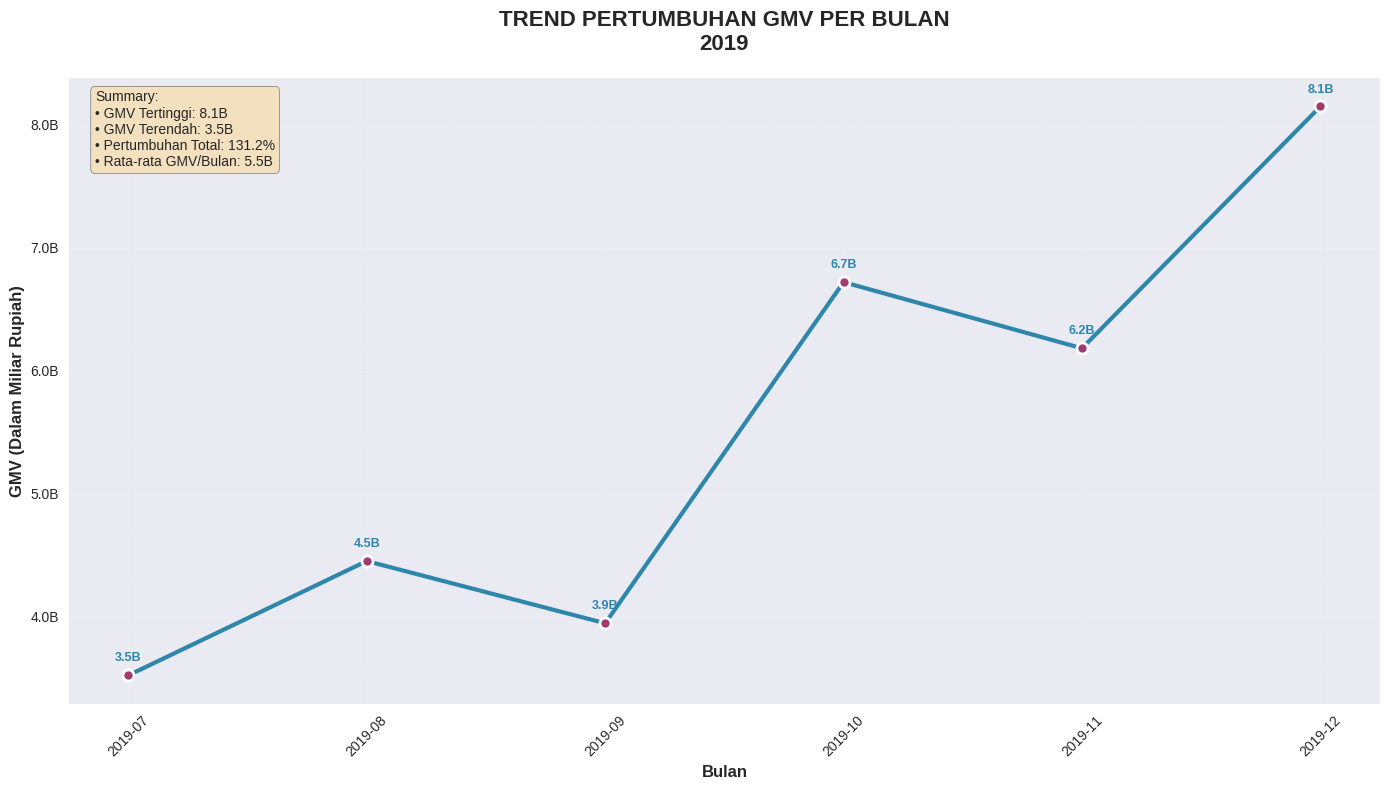

In [126]:
plt.figure(figsize=(14, 8))

# membuat Line Chart
plt.plot(monthly_gmv['order_month'],
         monthly_gmv['total_gmv']/1e9,  # Convert to billions
         marker='o',
         linewidth=3,
         markersize=8,
         color='#2E86AB',
         markerfacecolor='#A23B72',
         markeredgecolor='white',
         markeredgewidth=2)
# Menambahkan Title dan Axis Labels
plt.title('TREND PERTUMBUHAN GMV PER BULAN\n2019',
          fontsize=16,
          fontweight='bold',
          pad=20)

plt.xlabel('Bulan', fontsize=12, fontweight='bold')
plt.ylabel('GMV (Dalam Miliar Rupiah)', fontsize=12, fontweight='bold')

# Modifikasi Grid
plt.grid(True,
        alpha=0.3,
        linestyle='--',
        linewidth=0.5)

# Rotasi label bulan untuk readability
plt.xticks(rotation=45)

# Format y-axis untuk menampilkan dalam miliar
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}B'))

# Menambahkan nilai di setiap titik (from goewhaSyVH6X)
for i, (month, gmv) in enumerate(zip(monthly_gmv['order_month'], monthly_gmv['total_gmv']/1e9)):
    plt.annotate(f'{gmv:.1f}B',
                (i, gmv), # Use index 'i' for x-coordinate
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=9,
                fontweight='bold',
                color='#2E86AB')

# Menambahkan text box dengan informasi summary (from nWJB6u2JYJsS)
total_growth = ((monthly_gmv['total_gmv'].iloc[-1] - monthly_gmv['total_gmv'].iloc[0]) /
                monthly_gmv['total_gmv'].iloc[0]) * 100

info_text = f"""Summary:
• GMV Tertinggi: {monthly_gmv['total_gmv'].max()/1e9:.1f}B
• GMV Terendah: {monthly_gmv['total_gmv'].min()/1e9:.1f}B
• Pertumbuhan Total: {total_growth:.1f}%
• Rata-rata GMV/Bulan: {monthly_gmv['total_gmv'].mean()/1e9:.1f}B"""

plt.gca().text(0.02, 0.98, info_text,
              transform=plt.gca().transAxes,
              verticalalignment='top',
              bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
              fontsize=10)

# Optimasi dan Menampilkan Layout (from PxL9Fe_LYTf6)
plt.tight_layout()
plt.show()

## **Menambahkan growth rate**

In [128]:
growth_rates = []
for i in range(1, len(monthly_gmv)):
    growth = ((monthly_gmv['total_gmv'].iloc[i] - monthly_gmv['total_gmv'].iloc[i-1]) /
              monthly_gmv['total_gmv'].iloc[i-1]) * 100
    growth_rates.append(growth)

# **VISUALISASI TAMBAHAN - MULTI METRIC TREND**

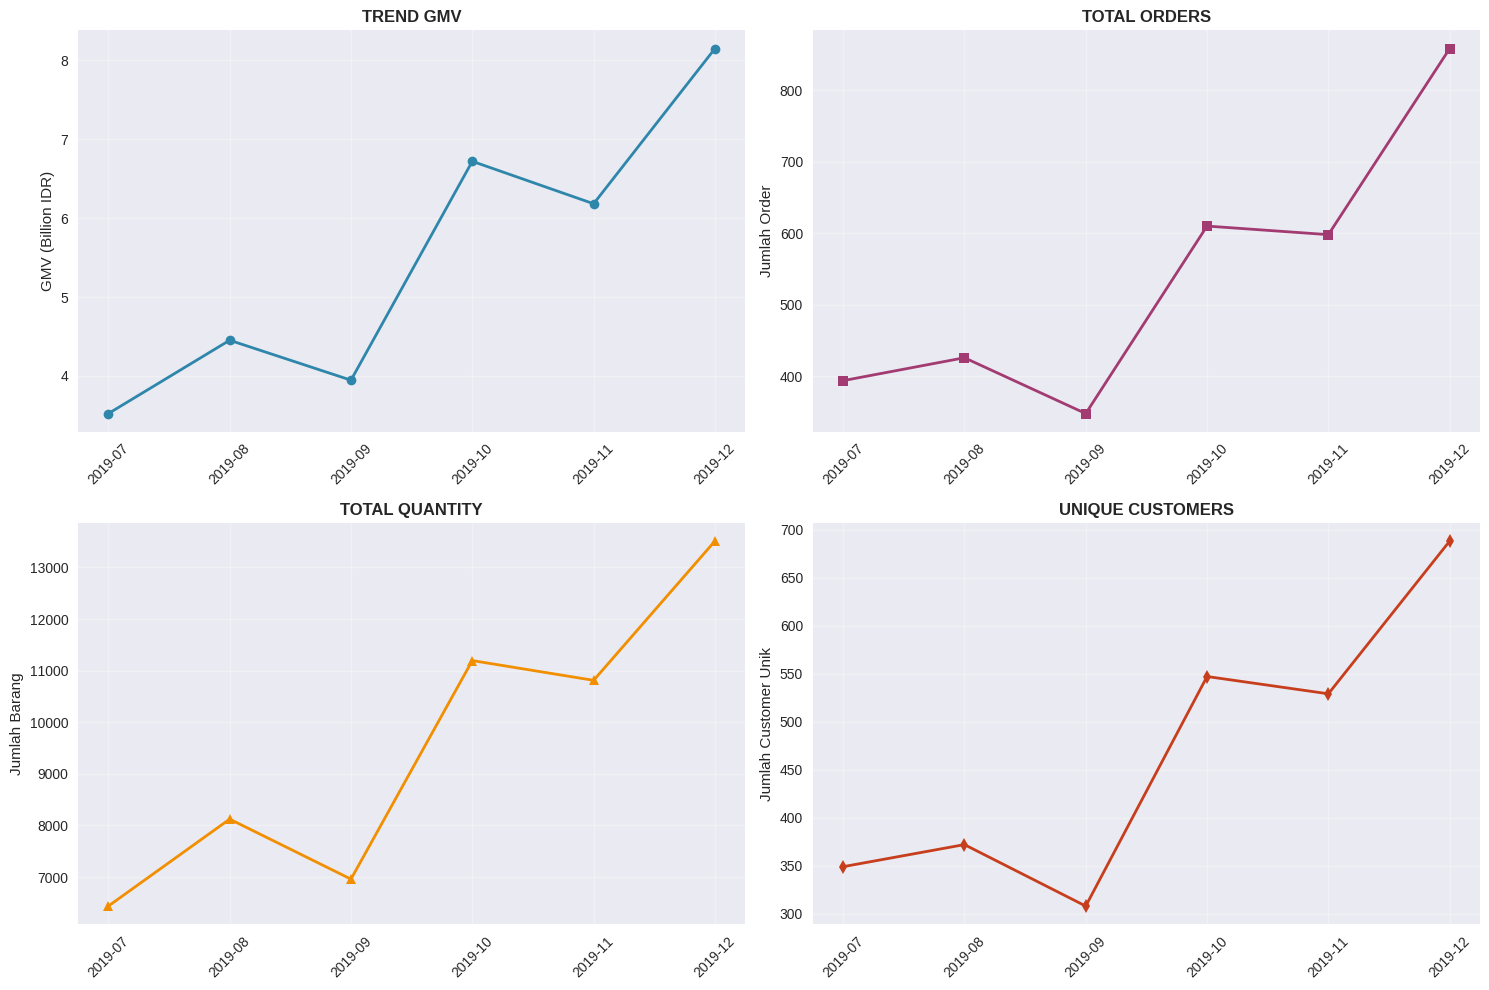

In [131]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# GMV Trend
ax1.plot(monthly_gmv['order_month'], monthly_gmv['total_gmv']/1e9,
         marker='o', color='#2E86AB', linewidth=2)
ax1.set_title('TREND GMV', fontweight='bold')
ax1.set_ylabel('GMV (Billion IDR)')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Total Orders
ax2.plot(monthly_gmv['order_month'], monthly_gmv['total_orders'],
         marker='s', color='#A23B72', linewidth=2)
ax2.set_title('TOTAL ORDERS', fontweight='bold')
ax2.set_ylabel('Jumlah Order')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Total Quantity
ax3.plot(monthly_gmv['order_month'], monthly_gmv['total_quantity'],
         marker='^', color='#F18F01', linewidth=2)
ax3.set_title('TOTAL QUANTITY', fontweight='bold')
ax3.set_ylabel('Jumlah Barang')
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# Unique Customers
ax4.plot(monthly_gmv['order_month'], monthly_gmv['unique_customers'],
         marker='d', color='#C73E1D', linewidth=2)
ax4.set_title('UNIQUE CUSTOMERS', fontweight='bold')
ax4.set_ylabel('Jumlah Customer Unik')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## **Unique Customers**

In [132]:
ax4.plot(monthly_gmv['order_month'], monthly_gmv['unique_customers'],
         marker='d', color='#C73E1D', linewidth=2)
ax4.set_title('UNIQUE CUSTOMERS', fontweight='bold')
ax4.set_ylabel('Jumlah Customer Unik')
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show() # Add plt.show() here

<Figure size 800x550 with 0 Axes>

# MENAMPILKAN STATISTIK DESKRIPTIF

In [133]:
print(f"Periode Data: {monthly_gmv['order_month'].min()} hingga {monthly_gmv['order_month'].max()}")
print(f"Total GMV selama periode: {monthly_gmv['total_gmv'].sum()/1e9:.2f} Miliar")
print(f"Rata-rata GMV per bulan: {monthly_gmv['total_gmv'].mean()/1e9:.2f} Miliar")
print(f"Pertumbuhan GMV dari pertama ke terakhir: {total_growth:.1f}%")

Periode Data: 2019-07 hingga 2019-12
Total GMV selama periode: 32.97 Miliar
Rata-rata GMV per bulan: 5.50 Miliar
Pertumbuhan GMV dari pertama ke terakhir: 131.2%
